# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis, 3 Observations:

-From a randomly generated list of 628 cities, we were able to gather weather information on 555 of those cities via the OpenWeatherMap API (http://api.openweathermap.org/data/2.5/weather?). We created four scatter plots from the data comparing the city latitude to (1)temperature, (2) humidity, (3) cloudiness, and (4) wind speed. 

By looking at how these scatter plots behave when approaching 0 on the x-axis (Latitude 0, aka the equator), we see that only the plot "Latitude vs Temperature" has strong observable trends. 

-From the data plotted on graph, "Latitude vs Temperature," we can see that on October 10, 2019, the temperature increases from city to city when approaching the equator. Therefore, we conclude that it is hotter as one gets closer to the equator.

-While rerunning the data analysis on different sample sizes, the program consistently returned more cities with positive value latitudes (0-90) than with negative value latitudes (-90-0). This is most likely the case due to the fact that the Northern hemisphere is more densely populated and contains more cities than the Southern Hemisphere. Our random generation of longitude and latitude numbers should return an even distribution of locations between the Northern and Southern hemispheres. However, when we searched for unique cities closest to those coordinates, the Southern Hemisphere will have more sets of coordinate pairs where the closest city is already accounted for by another coordinate pair.    


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)


628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

query_limit = 60
query_count = 0

columns = ['City Name', 'Country', 'Latitude', 'Longitude', 'Date', 'Tempurature', 'Humidity', 'Cloudiness', 'Wind Speed' ]

#Create empty lists to store openweather data
city_name, country, city_lat, city_lon, date, temp, humid, cloud, wind = ([] for i in range(len(columns)))


# Loop through the list of cities and perform a request for data on each
      #per API, only 60 requests per minute
for count in range(len(cities)):
    
    #Pause after 60 requests
    if query_count == query_limit:
        time.sleep(60)
        query_count = 0
        
    else: 
        query_count += 1
        
        try:
            response = requests.get(query_url + cities[count]).json() 
            print(f'Processing index {count}, city name: {cities[count]}')

            city_name.append(response["name"])
            country.append(response["sys"]["country"])
            city_lat.append(response["coord"]["lat"])
            city_lon.append(response["coord"]["lon"])
            temp.append(response["main"]["temp_max"])
            humid.append(response["main"]["humidity"])
            cloud.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])
            date.append(response["dt"])

        except (KeyError, IndexError):
            print(f'Cannot find weather data for city {cities[count]}')

        


Processing index 0, city name: pahrump
Processing index 1, city name: ostrovnoy
Processing index 2, city name: oktyabrskiy
Processing index 3, city name: pisco
Processing index 4, city name: kargasok
Processing index 5, city name: rikitea
Processing index 6, city name: yulara
Processing index 7, city name: dikson
Processing index 8, city name: port elizabeth
Processing index 9, city name: yellowknife
Processing index 10, city name: klaksvik
Processing index 11, city name: salinopolis
Processing index 12, city name: new norfolk
Processing index 13, city name: georgetown
Processing index 14, city name: belushya guba
Cannot find weather data for city belushya guba
Processing index 15, city name: ushuaia
Processing index 16, city name: punta arenas
Processing index 17, city name: fortuna
Processing index 18, city name: east london
Processing index 19, city name: bethel
Processing index 20, city name: oranjestad
Processing index 21, city name: saint george
Processing index 22, city name: kh

Processing index 180, city name: tucurui
Processing index 181, city name: omboue
Processing index 183, city name: makokou
Processing index 184, city name: ajdabiya
Processing index 185, city name: cherskiy
Processing index 186, city name: neyshabur
Processing index 187, city name: moron
Processing index 188, city name: jamestown
Processing index 189, city name: chokurdakh
Processing index 190, city name: natal
Processing index 191, city name: alice springs
Processing index 192, city name: mar del plata
Processing index 193, city name: sitka
Processing index 194, city name: aksarka
Processing index 195, city name: svetlaya
Processing index 196, city name: brekstad
Processing index 197, city name: marcona
Cannot find weather data for city marcona
Processing index 198, city name: umzimvubu
Cannot find weather data for city umzimvubu
Processing index 199, city name: tommot
Processing index 200, city name: hit
Processing index 201, city name: rochester
Processing index 202, city name: tuata

Processing index 360, city name: mwense
Processing index 361, city name: krasnovishersk
Processing index 362, city name: leningradskiy
Processing index 363, city name: lorengau
Processing index 364, city name: leshukonskoye
Processing index 366, city name: mahebourg
Processing index 367, city name: sao joao da barra
Processing index 368, city name: goderich
Processing index 369, city name: lima
Processing index 370, city name: gijon
Processing index 371, city name: olafsvik
Cannot find weather data for city olafsvik
Processing index 372, city name: najran
Processing index 373, city name: abiy adi
Cannot find weather data for city abiy adi
Processing index 374, city name: mitsamiouli
Processing index 375, city name: qingdao
Processing index 376, city name: bengkulu
Cannot find weather data for city bengkulu
Processing index 377, city name: povenets
Processing index 378, city name: itacoatiara
Processing index 379, city name: ban nahin
Processing index 380, city name: vestmannaeyjar
Proc

Processing index 537, city name: kununurra
Processing index 538, city name: muzhi
Processing index 539, city name: atambua
Processing index 540, city name: kolpashevo
Processing index 541, city name: soma
Processing index 542, city name: yelizovo
Processing index 543, city name: louisbourg
Cannot find weather data for city louisbourg
Processing index 544, city name: havre-saint-pierre
Processing index 545, city name: kapiri mposhi
Processing index 546, city name: tokur
Processing index 547, city name: jalu
Processing index 549, city name: pereleshinskiy
Processing index 550, city name: sinnamary
Processing index 551, city name: palabuhanratu
Cannot find weather data for city palabuhanratu
Processing index 552, city name: maldonado
Processing index 553, city name: nouadhibou
Processing index 554, city name: ust-nera
Processing index 555, city name: rincon
Processing index 556, city name: clara
Processing index 557, city name: calama
Processing index 558, city name: rusape
Processing ind

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
raw_temp_df = pd.DataFrame({"City Name": city_name, "Country": country, "Latitude": city_lat, "Longitude": city_lon, 
                            "Date":date, "Temp": temp, "Humidity":humid, "Cloud Coverage":cloud, "Wind Speed": wind})

temp_df = raw_temp_df.dropna()

temp_df.head()

,City Name,Country,Latitude,Longitude,Date,Temp,Humidity,Cloud Coverage,Wind Speed
550,Ust-Kuyga,RU,70.00,135.55,1570736486,3.18,92,92,3.97
551,Zhaotong,CN,27.34,103.71,1570736486,47.12,95,100,4.51
552,Nishihara,JP,35.74,139.53,1570736486,66.00,93,90,6.93
553,Xuddur,SO,4.12,43.89,1570736487,74.03,83,71,12.61
554,Cabedelo,BR,-6.97,-34.84,1570736487,80.60,74,40,14.99


In [5]:
#export to csv
# Note to avoid any issues later, use encoding="utf-8"
temp_df.to_csv("../cities.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [6]:
time_stamp = pd.to_datetime(date[0], unit = 's')

format_time = time_stamp.strftime('%b/%d/%Y')


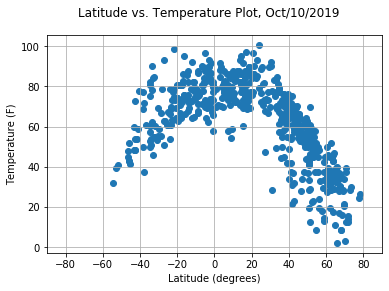

In [7]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Temperature Plot, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Temperature (F)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(temp) - 5, np.max(temp) + 5)
ax.scatter(city_lat, temp)
ax.grid()

# Save the Figure
plt.savefig("../Latitude_Temp_Plot.png")

plt.show()

#### Latitude vs. Humidity Plot

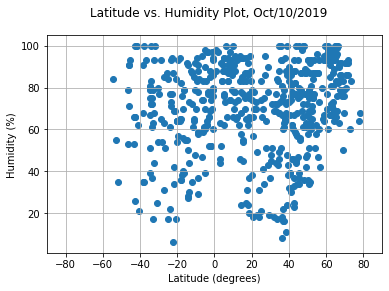

In [8]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Humidity Plot, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Humidity (%)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(humid) - 5, np.max(humid) + 5)
ax.scatter(city_lat, humid)
ax.grid()

# Save the Figure
plt.savefig("../Latitude_Humidity_Plot.png")

plt.show()

#### Latitude vs. Cloudiness Plot

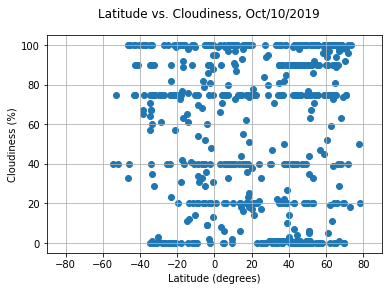

In [9]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Cloudiness, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Cloudiness (%)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(cloud) - 5, np.max(cloud) + 5)
ax.scatter(city_lat, cloud)
ax.grid()

# Save the Figure
plt.savefig("../Latitude_Cloudiness_Plot.png")

plt.show()

#### Latitude vs. Wind Speed Plot

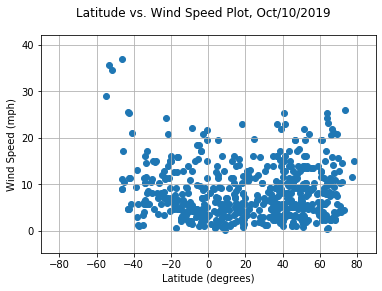

In [10]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Wind Speed Plot, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(wind) - 5, np.max(wind) + 5)
ax.scatter(city_lat, wind)
ax.grid()

# Save the Figure
plt.savefig("../Latitude_WindSpeed_Plot.png")

plt.show()